<h1>6 Machine Learning Models for Credit Risk </h1>

<h2>1 - Pré-processamento</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
credit_data = '/credit_data.csv' 

base_credit = pd.read_csv(credit_data)
base_credit.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Above we can see the first 5 rows of the data base where:
-  income: Anual Salary
- age: the client age
- loan: the loan for person
- default: 0(TRUE) if the loan was paid, 1(FALSE) loan not paid


In [3]:
# Visual analysis of the data.
grafico = px.scatter_matrix(base_credit, dimensions = ['age','income','loan'], color = 'default')
grafico.show()

In [4]:
# Tratamento de valores inconsistentes
base_credit.loc[base_credit['age']< 0]

# Apagar a coluna inteira(de todo os registros da base de dados)
base_credit2 = base_credit.drop('age', axis = 1)
base_credit2

# Apagar somento os registros com valores inconsistentes
base_credit3 = base_credit.drop(base_credit[base_credit['age']<0].index)

# Preencher os valores com as médias das idade
base_credit.loc[base_credit['age'] < 0, 'age'] = base_credit['age'][base_credit['age'] > 0].mean()

#Tratando valores Faltantes
base_credit.loc[pd.isnull(base_credit['age'])]

base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)
base_credit.loc[pd.isnull(base_credit['age'])]

base_credit.loc[(base_credit['clientid']== 29) | (base_credit['clientid']== 31) | (base_credit['clientid']== 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.9277,2082.625938,0
30,31,48528.852796,40.9277,6155.784670,0
31,32,23526.302555,40.9277,2862.010139,0


In [5]:
# Divisão Previsores e Classe
# X - Previsores
x_credit = base_credit.iloc[:, 1:4].values
x_credit

# Y - Classe
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [6]:
# Escalonamento de Atributos:
"""
Os valores estão em escalas muito diferentes, variando de unidades de dezena até unidades de centena de milhar. Isso pode fazer com que o algoritmo interprete de maneira erronea alguns dados.
Para corrigir isso nós temos duas maneira de "deixar na mesma escala":   

Podemos escalonar por meio de padronização ou normalização, neste caso usaremos Padronização.
"""
from sklearn.preprocessing import StandardScaler

# Padronização
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)


<h3>Divisão em bases de Treinamento e Teste</h3> 

In [7]:
from sklearn.model_selection import train_test_split
x_credit_treinamento, x_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(x_credit, y_credit, test_size = 0.25, random_state = 0)

In [8]:
# Bases de treinamento 
x_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [9]:
# Bases de teste
x_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [10]:
# Salvar as bases de dados
import pickle
with open ('credit.pkl', mode = 'wb') as f:
    pickle.dump([x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste],f)

<h2>2 - Aprendizagem bayesiana</h2>

In [11]:
with open ('credit.pkl', 'rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [12]:
from sklearn.naive_bayes import GaussianNB
naive_credit_data = GaussianNB()
naive_credit_data.fit(x_credit_treinamento, y_credit_treinamento)

GaussianNB()

In [13]:
 previsoes = naive_credit_data.predict(x_credit_teste)
 previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Função que calcula acurácia: rebece primeiro a base real e depois a de testes)
accuracy_score(y_credit_teste, previsoes)

0.938

In [15]:
comparison = y_credit_teste == previsoes
num_zeros = (comparison == 0).sum()
num_ones = (comparison == 1).sum()
taxa_performance = num_ones / (num_zeros + num_ones)
print( 'O algoritmo acertou', taxa_performance*100,'%')
    ###  #  ###

O algoritmo acertou 93.8 %


In [ ]:
pip install yellowbrick

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500



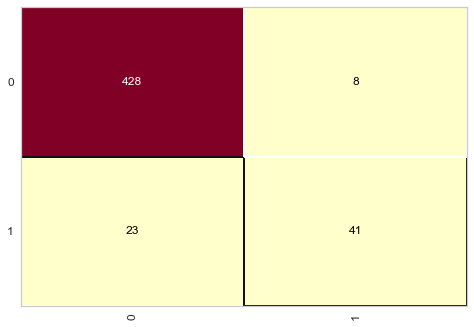

In [17]:
# Confusion Matrix
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive_credit_data)
cm.fit(x_credit, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

print(classification_report(y_credit_teste, previsoes))

<h2> 3 - Aprendizagem Decision Tree</h2>

Para descobrirmos quais valores colocarmos na no topo da nossa árvore, utilizamos essas duas fórmulas:
<br>
<br>
\begin{align}
\mathbf{Entropy(S)} = \sum_{i=1}^c - p_i log _2 p_i
\end{align}

<br>
<br>

\begin{align}
\mathbf {Gain(S,A)} = {Entropy(S)} - \sum_{veValues(A)}\frac{|Sv|}{|S|} {Entropy(Sv)}
\end{align}


In [18]:
from sklearn.tree import DecisionTreeClassifier
import pickle
with open('credit.pkl','rb') as f:
  x_credit_treinamento, y_credit_treinamento, x_credit_teste, y_credit_teste = pickle.load(f)

In [19]:
arvore_credit = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
arvore_credit.fit(x_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
previsoes = arvore_credit.predict(x_credit_teste)

In [21]:
# Métricas: porcentagem de acertos entre o teste e o y_credit
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.982

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



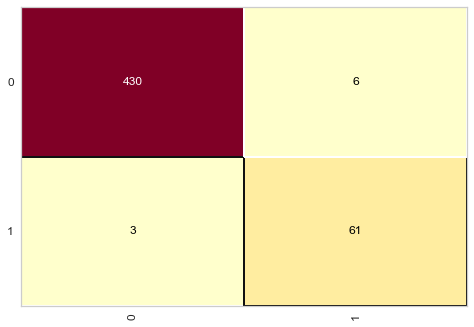

In [22]:
cm = ConfusionMatrix(arvore_credit)
cm.fit(x_credit_treinamento, y_credit_treinamento)
cm.score(x_credit_teste, y_credit_teste)

print(classification_report(y_credit_teste, previsoes))

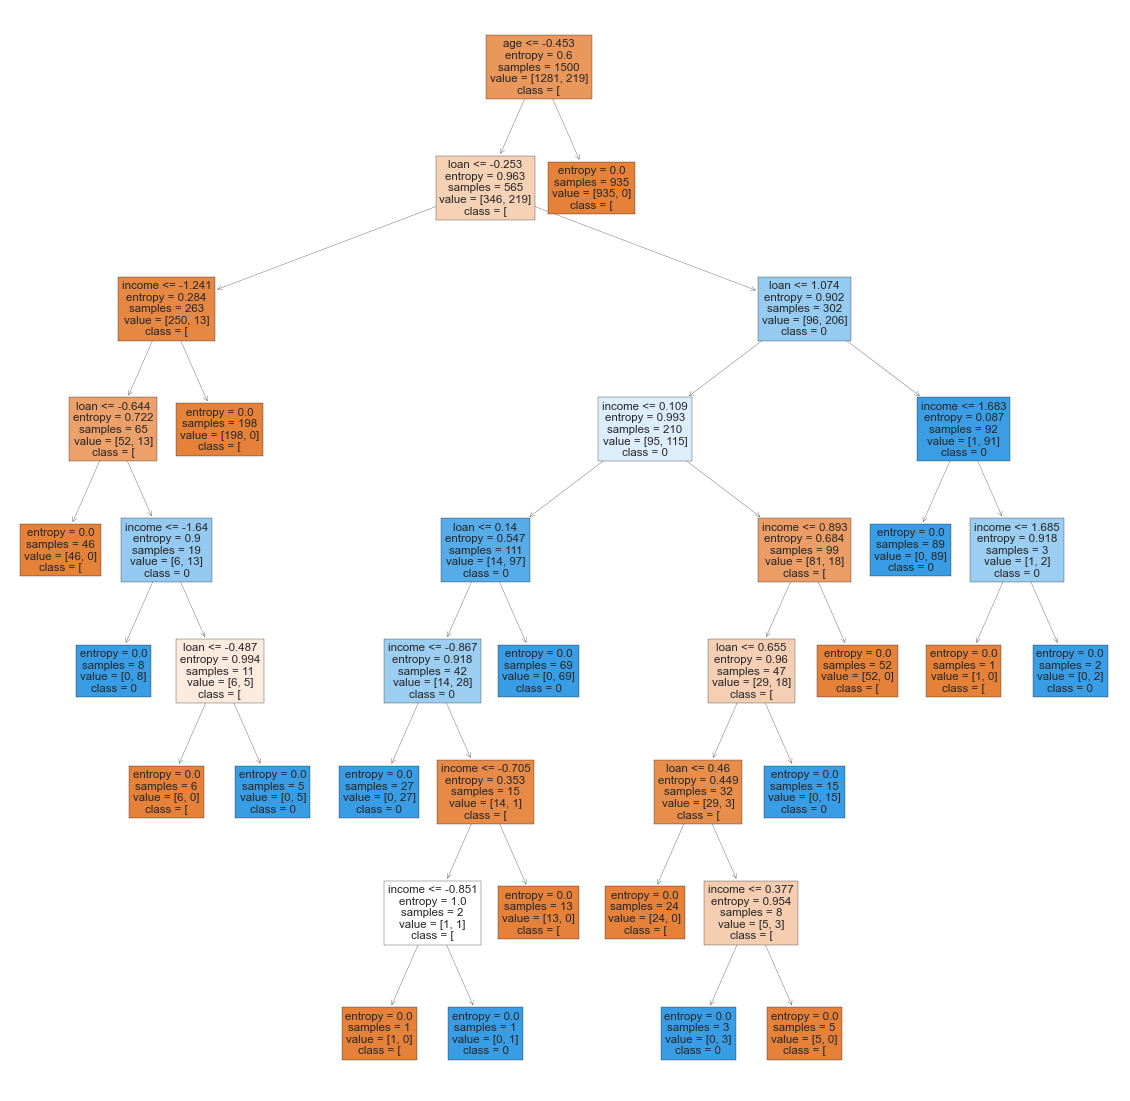

In [23]:
# Para visualizar a estrutura da árvore que o algoritmo criou
from sklearn import tree 
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize =(20,20))
tree.plot_tree(arvore_credit, feature_names = previsores, class_names = str(arvore_credit.classes_), filled = True);
fig.savefig('arvore_credit.png')

<h2> 4 - Aprendizagem por Regras</h2>

In [ ]:
pip install Orange3

In [25]:
import Orange

In [26]:
base_credit = Orange.data.Table('/credit_data_regras.csv')

base_dividida = Orange.evaluation.testing.sample(base_credit, n = 0.25)
base_dividida

([[1872, 61765.7, 59.9559, 3649.64, 0],
  [1785, 58772.9, 46.505, 7048.01, 0],
  [1228, 31233.3, 41.7041, 1662.45, 0],
  [719, 31895.7, 48.1859, 3423.35, 0],
  [936, 62887.8, 42.8418, 6849.48, 0],
  ...
 ],
 [[1969, 55068.7, 51.7574, 4852.77, 0],
  [1466, 47704.4, 21.8404, 2717.08, 0],
  [1274, 24369.8, 61.7394, 1366.54, 0],
  [1866, 27045.4, 50.2212, 2503.79, 0],
  [209, 61000, 48.6236, 2160.78, 0],
  ...
 ])

In [27]:
# Vamos dividir a base de dados em treinamento e teste
# Aqui nós não precisamos dividir a base em atributos previsores e classe, aquela X e Y.

base_treinamento = base_dividida[1]
base_teste = base_dividida[0]

In [29]:
cn2 = Orange.classification.rules.CN2Learner()
regras_credit = cn2(base_treinamento)

ValueError: Categorical class variable expected.

In [ ]:
# Verificando as regras geradas:
for regras in regras_credit.rule_list: # essa regra .rule_list faz a listagem de cada uma das regras
  print(regras)

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_treinamento, base_teste,[lambda testdata: regras_credit])

In [ ]:
# Testar a acurácia do modelo
Orange.evaluation.CA(previsoes)

<h2>5 - KNN - Aprendizado em Instâncias</h2>

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
import pickle
with open('/credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [41]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [33]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [34]:
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_credit_treinamento, y_credit_treinamento)

KNeighborsClassifier()

In [35]:
previsoes = knn_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [36]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [37]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes) # padronização

0.986

0.986

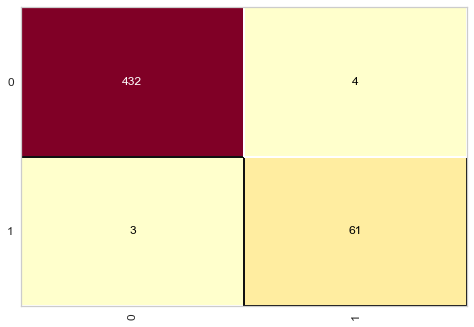

In [38]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [39]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.94      0.95      0.95        64

    accuracy                           0.99       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



<h2>6 - Regressão logística</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
logistic_credit = LogisticRegression(random_state=1)
logistic_credit.fit(X_credit_treinamento, y_credit_treinamento)

LogisticRegression(random_state=1)

In [ ]:
logistic_credit.intercept_

array([-6.02975455])

In [ ]:
logistic_credit.coef_

array([[-2.5492665 , -3.72279323,  3.93940035]])

In [ ]:
previsoes = logistic_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.946

0.946

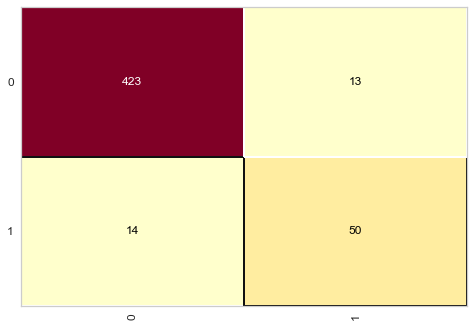

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       436
           1       0.79      0.78      0.79        64

    accuracy                           0.95       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.95      0.95      0.95       500



<h2> 7 - SVM - Support Vector Machine</h2>

In [ ]:
from sklearn.svm import SVC

In [ ]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [ ]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [ ]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [ ]:
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm_credit.fit(X_credit_treinamento, y_credit_treinamento)

SVC(C=2.0, random_state=1)

In [ ]:
previsoes = svm_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.988

0.988

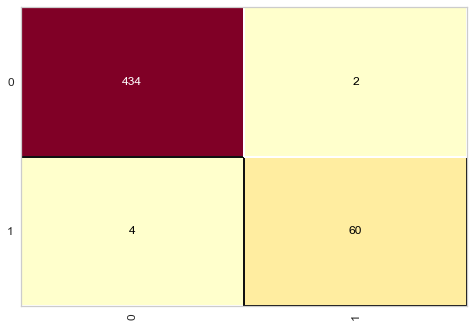

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       436
           1       0.97      0.94      0.95        64

    accuracy                           0.99       500
   macro avg       0.98      0.97      0.97       500
weighted avg       0.99      0.99      0.99       500



<h2>8 - Redes Neurais Artificiais</h2>

<h3> Fundamentos Teóricos</h3>

- Perceptron
- Treinamento/ ajuste dos pesos
- Gradient descent 
- Cálculo do delta
- Learning rate
- Momentum 
- Backpropagation

In [42]:
from sklearn.neural_network import MLPClassifier

In [43]:
import pickle
with open('credit.pkl', 'rb') as f:  
  X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

In [44]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [45]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

In [46]:
(3 + 1) / 2

2.0

In [50]:
# 3 -> 100 -> 100 -> 1
# 3 -> 2 -> 2 -> 1
rede_neural_credit = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'relu',
                                   hidden_layer_sizes = (20,20))
rede_neural_credit.fit(X_credit_treinamento, y_credit_treinamento)

Iteration 1, loss = 0.64215830
Iteration 2, loss = 0.59220311
Iteration 3, loss = 0.55060531
Iteration 4, loss = 0.51705534
Iteration 5, loss = 0.48764396
Iteration 6, loss = 0.46109770
Iteration 7, loss = 0.43553280
Iteration 8, loss = 0.41022862
Iteration 9, loss = 0.38427929
Iteration 10, loss = 0.35853218
Iteration 11, loss = 0.33296737
Iteration 12, loss = 0.30823669
Iteration 13, loss = 0.28508829
Iteration 14, loss = 0.26372432
Iteration 15, loss = 0.24443891
Iteration 16, loss = 0.22749558
Iteration 17, loss = 0.21287233
Iteration 18, loss = 0.19942279
Iteration 19, loss = 0.18737017
Iteration 20, loss = 0.17691660
Iteration 21, loss = 0.16732023
Iteration 22, loss = 0.15856000
Iteration 23, loss = 0.15037055
Iteration 24, loss = 0.14323614
Iteration 25, loss = 0.13673413
Iteration 26, loss = 0.13064841
Iteration 27, loss = 0.12535764
Iteration 28, loss = 0.12062169
Iteration 29, loss = 0.11634600
Iteration 30, loss = 0.11242115
Iteration 31, loss = 0.10906131
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

In [51]:
previsoes = rede_neural_credit.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_teste, previsoes)

0.996

In [54]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       436
           1       0.98      0.98      0.98        64

    accuracy                           1.00       500
   macro avg       0.99      0.99      0.99       500
weighted avg       1.00      1.00      1.00       500



0.996

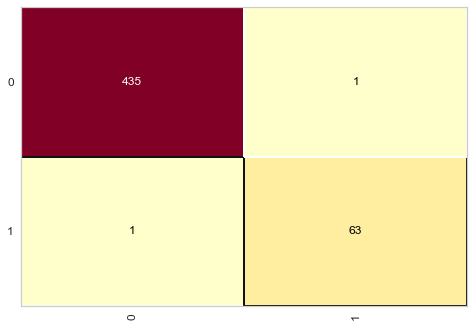

In [55]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_credit)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)